In [15]:
import numpy
from matplotlib import pyplot
%matplotlib inline

# 1

In [58]:
def ftcs( T0, nt, sigma ):
    
    Tn = T0.copy()
    T = T0.copy()
    
    for n in range( nt ):
        
        Tn = T.copy()
        T[ 1:-1 ] = Tn[ 1:-1 ] + sigma * ( Tn[ 2: ] - 2 * Tn[ 1:-1 ] + Tn[ :-2 ] )
        
    return T
        

In [59]:
nt1 = 100
nt2 = 1000
nx = 51
L = 1.
dx = L / ( nx - 1 )
alpha = 1.22e-3
sigma1 = .5
sigma2 = 1
x = numpy.linspace( 0., L, nx )
T0 = numpy.zeros_like( x )
T0[ 0 ] = 100

In [60]:
T1 = ftcs( T0, nt1, sigma1 )
T2 = ftcs( T0, nt2, sigma1 )
T3 = ftcs( T0, nt1, sigma2 )
T4 = ftcs( T0, nt2, sigma2 )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in subtract
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in add
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in add
  if __name__ == '__main__':


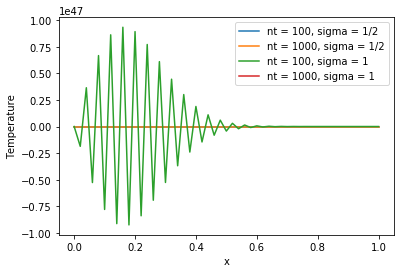

In [65]:
pyplot.plot( x, T1, label = 'nt = 100, sigma = 1/2' );
pyplot.plot( x, T2, label = 'nt = 1000, sigma = 1/2' );
pyplot.plot( x, T3, label = 'nt = 100, sigma = 1' );
pyplot.plot( x, T4, label = 'nt = 1000, sigma = 1' );
pyplot.xlabel( 'x' );
pyplot.ylabel( 'Temperature' );
pyplot.legend();

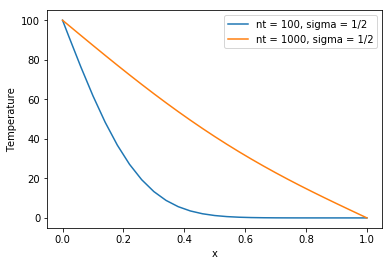

In [71]:
pyplot.plot( x, T1, label = 'nt = 100, sigma = 1/2' );
pyplot.plot( x, T2, label = 'nt = 1000, sigma = 1/2' );
pyplot.xlabel( 'x' );
pyplot.ylabel( 'Temperature' );
pyplot.legend();

In [66]:
def ftcs2( T0, nt, sigma ):
    
    Tn = T0.copy()
    T = T0.copy()
    
    for n in range( nt ):
        
        Tn = T.copy()
        T[ 1:-1 ] = Tn[ 1:-1 ] + sigma * ( Tn[ 2: ] - 2 * Tn[ 1:-1 ] + Tn[ :-2 ] )
        T[ -1 ] = T[ -2 ]
        
    return T
        

In [67]:
T5 = ftcs2( T0, nt2, sigma1 )

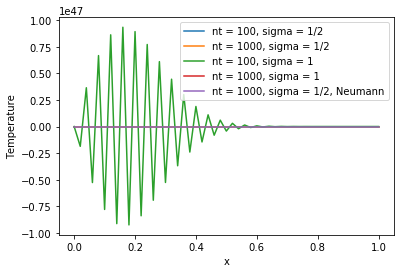

In [69]:
pyplot.plot( x, T1, label = 'nt = 100, sigma = 1/2' );
pyplot.plot( x, T2, label = 'nt = 1000, sigma = 1/2' );
pyplot.plot( x, T3, label = 'nt = 100, sigma = 1' );
pyplot.plot( x, T4, label = 'nt = 1000, sigma = 1' );
pyplot.plot( x, T5, label = 'nt = 1000, sigma = 1/2, Neumann' );
pyplot.xlabel( 'x' );
pyplot.ylabel( 'Temperature' );
pyplot.legend();

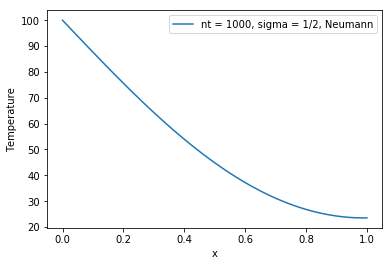

In [70]:
pyplot.plot( x, T5, label = 'nt = 1000, sigma = 1/2, Neumann' );
pyplot.xlabel( 'x' );
pyplot.ylabel( 'Temperature' );
pyplot.legend();

In [75]:
T5[-1] - T5[-2]

0.0

# 2

In [ ]:
pyplot.rc('font', family='serif', size=16)

In [115]:
def lhs_operator( N, sigma ):
    
    D = numpy.diag( ( 2 + 1 / sigma ) * numpy.ones( N ) )
    D[ -1, -1 ] = 1 + 1 / sigma 
    U = numpy.diag( -1. * numpy.ones( N - 1 ), k = 1 )
    L = numpy.diag( -1. * numpy.ones( N - 1 ), k = -1 )
    A = D + U + L
    
    return A

def rhs_vector( T, sigma, qdx ):
    
    b = T[ 1:-1 ] / sigma
    b[ 0 ] += T[ 0 ]
    b[ -1 ] += qdx
    
    return b

In [116]:
def btcs( T0, nt, sigma, dx, q = 0. ):
    
    T = T0.copy()
    A = lhs_operator( len( T0[ 1:-1 ] ), sigma )
    
    for n in range( nt ):
        
        b = rhs_vector( T, sigma, q * dx )
        T[ 1:-1 ] = numpy.linalg.solve( A, b )
        T[ -1 ] = T[ -2 ] + q * dx
        
    return T 

In [117]:
T_btcs = btcs( T0, nt1, sigma1, dx, 0 )

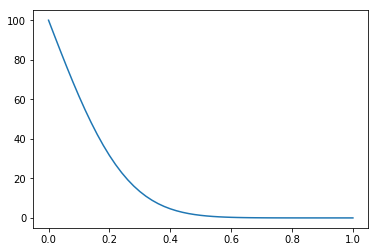

In [118]:
pyplot.plot( x, T_btcs )